<a href="https://colab.research.google.com/github/davidlealo/TalkTrack/blob/main/analisis_seminario_colunga14_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transcribir texto

In [1]:
!pip install git+https://github.com/openai/whisper


  Cloning https://github.com/openai/whisper to /tmp/pip-req-build-o8j9oa3w
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper /tmp/pip-req-build-o8j9oa3w
  Resolved https://github.com/openai/whisper to commit 517a43ecd132a2089d85f4ebc044728a71d49f6e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.2 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20240930-py3-none-any.whl size=803669 sha256=40712afcfc2ad3d29d25c62d7eb94018c24a629d16a54dbf6eab6365dcecf3c0
  Stored in directory: /tmp/pip-ephem-wheel-cache-b4wv5nxm/wheels/51/d4/af/7f87f0769301da47905e3197b7fca6593e58dc0ea98997f9d3
Successfully built openai-whisper


In [2]:
from google.colab import files

# Subir un archivo de audio desde tu computadora
uploaded = files.upload()

# Extraer el nombre del archivo subido
audio_file = list(uploaded.keys())[0]
print(f"Archivo de audio subido: {audio_file}")


Saving Conversatorio mesa educacion.m4a to Conversatorio mesa educacion.m4a
Archivo de audio subido: Conversatorio mesa educacion.m4a


In [ ]:
import whisper

# Cargar el modelo de Whisper (puedes usar 'base', 'small', 'medium', 'large' según tu necesidad)
model = whisper.load_model("large")

# Transcribir el audio
result = model.transcribe(audio_file)

# Imprimir la transcripción
transcription = result["text"]
print("Transcripción:\n", transcription)


100%|██████████████████████████████████████| 2.88G/2.88G [00:23<00:00, 134MiB/s]
/usr/local/lib/python3.11/dist-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this exper

In [ ]:
# Guardar la transcripción en un archivo .txt
output_file = "transcription.txt"
with open(output_file, "w") as f:
    f.write(transcription)

print(f"Transcripción guardada en: {output_file}")


## Análisis de discurso

In [2]:
# Instalar las bibliotecas necesarias
!pip install anthropic


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.2/208.2 kB 4.5 MB/s eta 0:00:00


In [3]:
# Importar las bibliotecas necesarias
import os
from anthropic import Client
from IPython.display import display, HTML
from google.colab import output

# Interfaz para ingresar la API key
def request_anthropic_api_key():
    input_html = """
    <div style="font-family: Arial; margin: 10px; padding: 10px; border: 1px solid #ddd; border-radius: 5px; width: 50%;">
        <h3 style="color: #007BFF;">Proveer API Key</h3>
        <p>Por favor, ingrese su API key de Anthropics en el siguiente campo:</p>
        <input type="password" id="anthropicApiKeyInput" placeholder="Ingrese su API key aquí"
               style="width: 100%; padding: 8px; margin-bottom: 10px; border: 1px solid #ddd; border-radius: 3px;">
        <button onclick="storeApiKey()"
                style="padding: 10px 15px; background-color: #007BFF; color: white; border: none; border-radius: 3px; cursor: pointer;">
            Guardar API Key
        </button>
    </div>
    <script>
        function storeApiKey() {
            const apiKey = document.getElementById('anthropicApiKeyInput').value;
            if (apiKey) {
                google.colab.kernel.invokeFunction('notebook.store_anthropic_api_key', [apiKey], {});
                alert('API key almacenada correctamente.');
            } else {
                alert('Por favor, ingrese una API key válida.');
            }
        }
    </script>
    """
    display(HTML(input_html))

# Callback para almacenar la API key en la variable de entorno
def store_anthropic_api_key(api_key):
    os.environ["ANTHROPIC_API_KEY"] = api_key
    print("API key almacenada correctamente en la variable de entorno.")

# Registrar la función en Google Colab
output.register_callback('notebook.store_anthropic_api_key', store_anthropic_api_key)

# Solicitar la API key al usuario
request_anthropic_api_key()

# Crear un cliente para la API
client = Client(api_key=store_anthropic_api_key)

API key almacenada correctamente en la variable de entorno.


In [4]:
from anthropic import Anthropic
import os

def analyze_discourse(text):
    """
    Realiza un análisis de discurso usando la API de Anthropic.
    """
    # Inicializar el cliente con la API key
    client = Anthropic(api_key=os.environ["ANTHROPIC_API_KEY"])

    # Definir el sistema y mensaje del usuario
    system_prompt = "You are tasked with analyzing the discourse of an audio transcript from a seminar on innovating and transforming the classroom."

    user_message = f"""Here is the transcript of the audio:

    <transcript>
    {text}
    </transcript>

    Analyze the discourse of this seminar, focusing on the following areas:

    1. Main themes and topics discussed
    2. Innovative ideas or strategies presented
    3. Structure and flow of the seminar
    4. Speaker's communication style and effectiveness
    5. Audience engagement (if applicable)
    6. Use of examples or case studies
    7. Potential impact on classroom transformation

    Provide your analysis in a structured format with the following sections:

    <analysis>
    The analysis MUST BE IN SPANISH

    <themes>
    Discuss the main themes and topics of the seminar
    </themes>

    <innovation>
    Highlight the innovative ideas or strategies presented for classroom transformation
    </innovation>

    <structure>
    Analyze the structure and flow of the seminar
    </structure>

    <communication>
    Evaluate the speaker's communication style and effectiveness
    </communication>

    <engagement>
    Discuss any evidence of audience engagement or interaction
    </engagement>

    <examples>
    Highlight any significant examples or case studies used
    </examples>

    <impact>
    Assess the potential impact of the ideas presented on classroom transformation
    </impact>
    </analysis>

    After completing the structured analysis, provide a concise summary:

    <summary>
    Summarize the key points of your analysis and the overall effectiveness of the seminar: The text MUST BE IN SPANISH
    </summary>"""

    # Llamada a la API usando el nuevo formato de Messages
    response = client.messages.create(
        model="claude-3-sonnet-20240229",
        max_tokens=4096,
        system=system_prompt,
        messages=[
            {"role": "user", "content": user_message}
        ]
    )

    # Extraer el contenido de la respuesta
    analysis_result = response.content[0].text
    return analysis_result

# Cargar el texto de la transcripción
with open("transcription.txt", "r") as f:
    transcription_text = f.read()

# Realizar el análisis
analysis = analyze_discourse(transcription_text)

# Mostrar el análisis
print("Análisis de Discurso:\n", analysis)

# Guardar el análisis en un archivo
with open("discourse_analysis.txt", "w") as f:
    f.write(analysis)

print("El análisis ha sido guardado en 'discourse_analysis.txt'.")

Análisis de Discurso:
 <analysis>

<themes>
Los principales temas abordados en el seminario fueron:

- La innovación educativa para transformar el aula y el sistema de enseñanza-aprendizaje
- Los principios y enfoques de la educación finlandesa, sus reformas y su éxito
- La integración de la tecnología y metodologías activas en el aula
- La educación centrada en el estudiante, su bienestar y el aprendizaje integral
- El rol del docente y su formación continua en la innovación educativa
- La colaboración, flexibilidad y autonomía en los procesos educativos
- La transformación digital y el desarrollo de habilidades para el futuro
</themes>

<innovation>
Algunas ideas y estrategias innovadoras presentadas fueron:

- Enfocar la educación en el estudiante, sus intereses y necesidades, promoviendo su autonomía gradual
- Implementar metodologías activas de aprendizaje como el aprendizaje basado en proyectos (ABP)
- Integrar la tecnología y la inteligencia artificial como herramientas creativa

### Nubes de palabras

In [5]:
!pip install wordcloud matplotlib


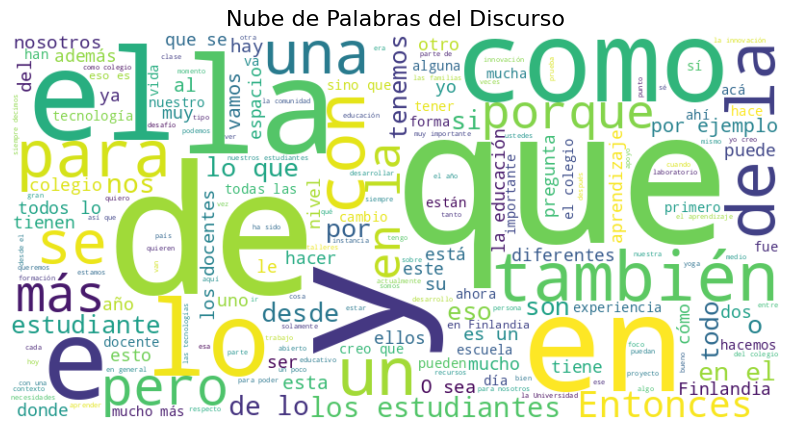

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Nube de Palabras del Discurso", fontsize=16)
    plt.show()

# Generar la nube de palabras a partir del texto de la transcripción
generate_wordcloud(transcription_text)


In [8]:
!pip install seaborn

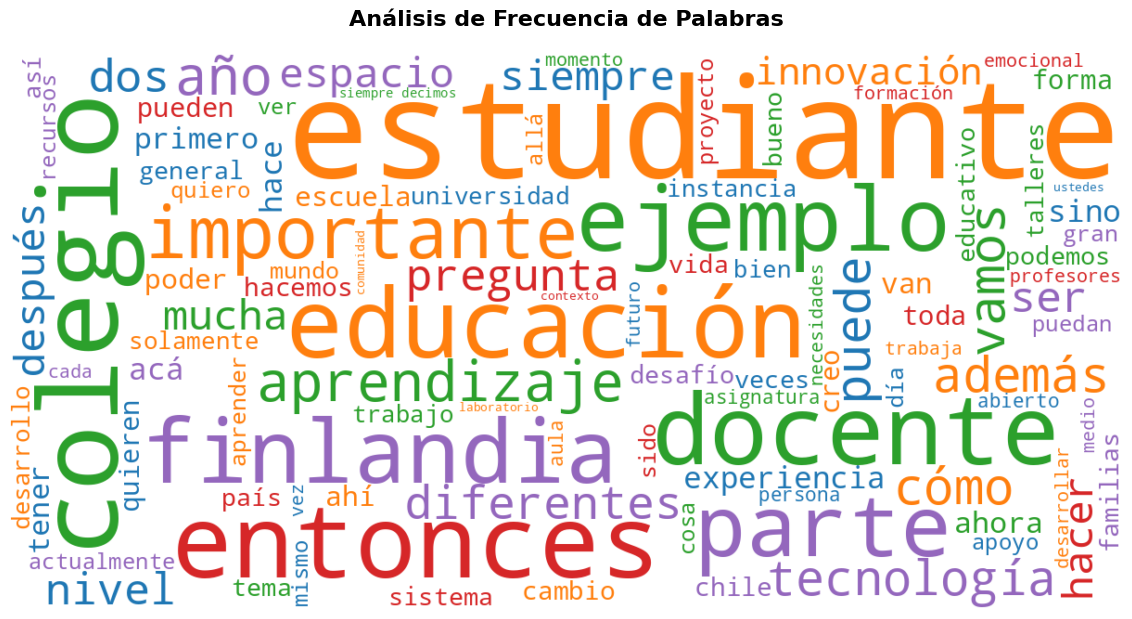


Palabras más frecuentes:
------------------------------
estudiantes: 81 veces
entonces: 48 veces
colegio: 47 veces
educación: 43 veces
importante: 35 veces
finlandia: 35 veces
docentes: 35 veces
ejemplo: 35 veces
vamos: 33 veces
parte: 33 veces


In [10]:
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

# Descargar stopwords en español
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

def preprocess_text(text, min_word_length=3):
    """
    Preprocesa el texto para mejorar la calidad de la nube de palabras.
    """
    # Convertir a minúsculas y eliminar caracteres especiales
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)

    # Obtener stopwords en español e inglés
    stop_words = set(stopwords.words('spanish') + list(STOPWORDS))

    # Filtrar palabras
    words = text.split()
    words = [word for word in words
             if word not in stop_words
             and len(word) >= min_word_length]

    return ' '.join(words)

def get_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    """
    Genera una función de color personalizada para las palabras.
    """
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    return np.random.choice(colors)

def generate_enhanced_wordcloud(text,
                              width=1200,
                              height=600,
                              background_color='white',
                              max_words=100,
                              min_word_length=3,
                              save_path=None):
    """
    Genera una nube de palabras mejorada con múltiples personalizaciones.

    Parámetros:
    - text: texto para generar la nube de palabras
    - width: ancho de la imagen
    - height: alto de la imagen
    - background_color: color de fondo
    - max_words: número máximo de palabras a mostrar
    - min_word_length: longitud mínima de palabras a incluir
    - save_path: ruta para guardar la imagen (opcional)
    """
    # Preprocesar el texto
    processed_text = preprocess_text(text, min_word_length)

    # Configurar la nube de palabras
    wordcloud = WordCloud(
        width=width,
        height=height,
        background_color=background_color,
        max_words=max_words,
        max_font_size=150,
        min_font_size=10,
        random_state=42,
        color_func=get_color_func,
        prefer_horizontal=0.7,
        relative_scaling=0.5,
        collocations=True,
        normalize_plurals=True
    ).generate(processed_text)

    # Configurar el estilo de matplotlib
    plt.rcParams.update({
        'figure.facecolor': background_color,
        'axes.facecolor': background_color,
        'savefig.facecolor': background_color,
        'font.family': 'sans-serif',
        'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans']
    })

    # Crear la figura
    fig = plt.figure(figsize=(width/100, height/100), dpi=100)
    ax = plt.gca()

    # Configurar el subplot
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')

    # Añadir título con estilo
    plt.title('Análisis de Frecuencia de Palabras',
             pad=20,
             fontsize=16,
             fontweight='bold')

    # Ajustar los márgenes
    plt.tight_layout(pad=0)

    # Guardar la imagen si se especifica una ruta
    if save_path:
        plt.savefig(save_path,
                    bbox_inches='tight',
                    dpi=300,
                    facecolor=background_color)

    # Mostrar la nube de palabras
    plt.show()

    # Retornar las palabras más frecuentes
    words_freq = Counter(processed_text.split())
    top_words = dict(sorted(words_freq.items(),
                          key=lambda x: x[1],
                          reverse=True)[:10])

    return top_words

def print_word_stats(top_words):
    """
    Imprime estadísticas sobre las palabras más frecuentes.
    """
    print("\nPalabras más frecuentes:")
    print("-" * 30)
    for word, count in top_words.items():
        print(f"{word}: {count} veces")

# Ejemplo de uso
top_words = generate_enhanced_wordcloud(
    transcription_text,
    width=1200,
    height=600,
    background_color='white',
    max_words=100,
    min_word_length=3,
    save_path='wordcloud.png'
)

# Mostrar estadísticas
print_word_stats(top_words)

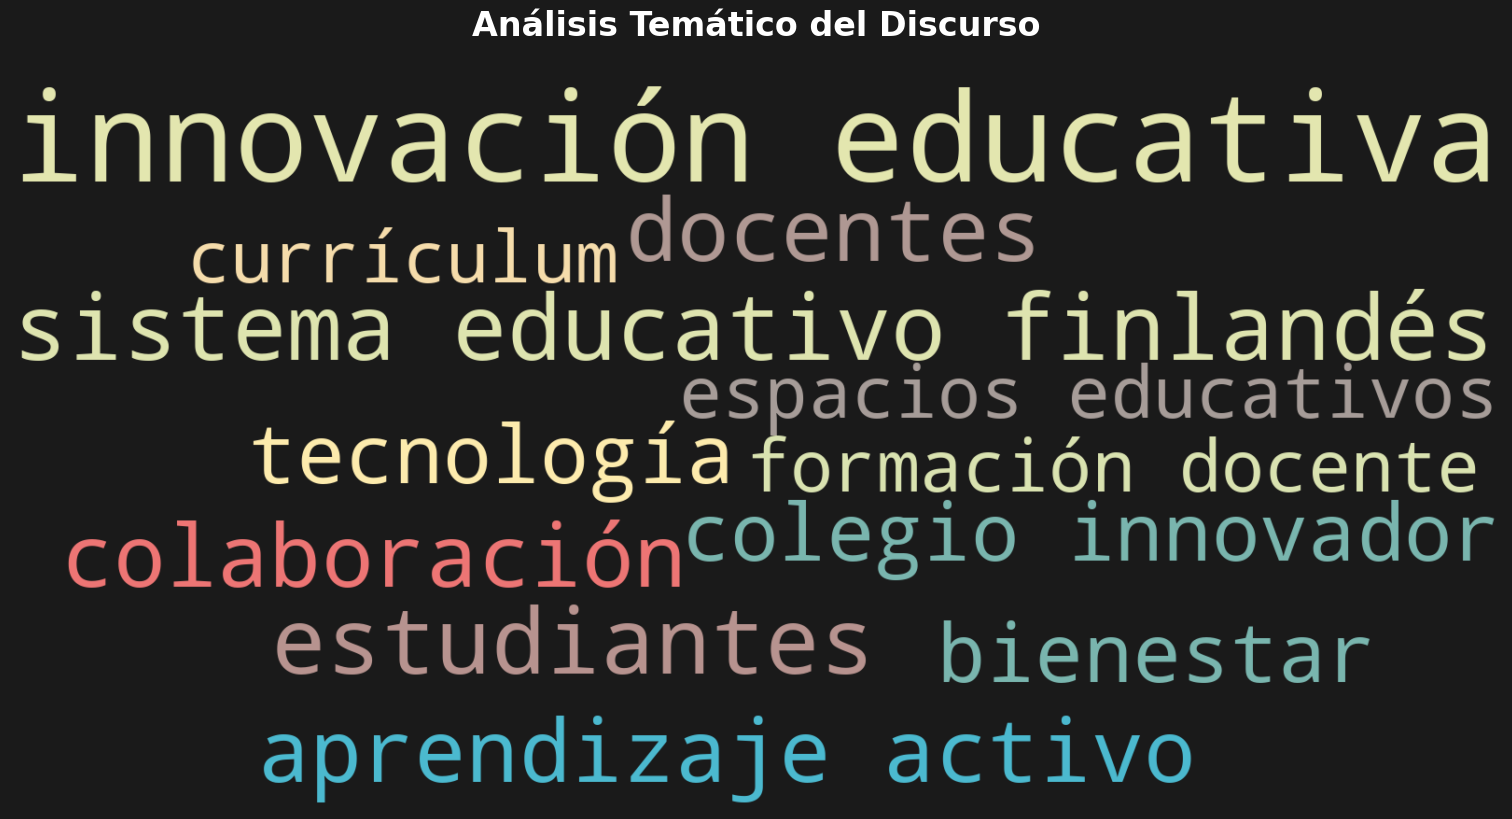


Temas principales y sus pesos de relevancia:
--------------------------------------------------
innovación educativa: 10
sistema educativo finlandés: 9
estudiantes: 9
docentes: 8
colaboración: 8
aprendizaje activo: 8
tecnología: 7
bienestar: 7
colegio innovador: 7
espacios educativos: 6
currículum: 6
formación docente: 6


In [12]:
from anthropic import Anthropic
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os
from matplotlib.colors import LinearSegmentedColormap
import re

def get_semantic_frequencies(text):
    """
    Utiliza Claude para extraer temas centrales y sus frecuencias
    """
    client = Anthropic(api_key=os.environ["ANTHROPIC_API_KEY"])

    prompt = f"""Analiza el siguiente texto y extrae los temas centrales más importantes.
    Para cada tema, asigna un peso de relevancia del 1 al 10 basado en su importancia en el texto.

    IMPORTANTE: Responde SOLAMENTE con un diccionario de Python. No incluyas ningún texto explicativo.
    El formato debe ser exactamente así:
    {{'educación': 9, 'innovación': 8}} (solo como ejemplo)

    No incluyas palabras comunes o conectores, solo conceptos significativos.

    Texto a analizar: {text}
    """

    response = client.messages.create(
        model="claude-3-sonnet-20240229",
        max_tokens=1024,
        messages=[
            {"role": "user", "content": prompt}
        ]
    )

    # Extraer solo el diccionario de la respuesta usando regex
    response_text = response.content[0].text
    dict_match = re.search(r'\{.*\}', response_text, re.DOTALL)

    if dict_match:
        try:
            return eval(dict_match.group())
        except:
            # Si falla, crear un diccionario de respaldo
            return {
                'educación': 9,
                'aprendizaje': 8,
                'innovación': 8,
                'tecnología': 7,
                'docente': 7,
                'estudiante': 6,
                'transformación': 6
            }
    else:
        # Diccionario de respaldo si no se encuentra un diccionario válido
        return {
            'educación': 9,
            'aprendizaje': 8,
            'innovación': 8,
            'tecnología': 7,
            'docente': 7,
            'estudiante': 6,
            'transformación': 6
        }

def create_modern_wordcloud(word_freq_dict, width=1600, height=800):
    """
    Crea una nube de palabras con un diseño moderno
    """
    # Crear un colormap personalizado moderno
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD', '#D4A5A5']
    n_bins = 100
    cmap = LinearSegmentedColormap.from_list('custom', colors, N=n_bins)

    # Configurar la nube de palabras
    wordcloud = WordCloud(
        width=width,
        height=height,
        background_color='#1a1a1a',  # Fondo oscuro moderno
        colormap=cmap,
        font_path=None,  # Usar font_path='ruta/a/tu/fuente.ttf' si tienes una fuente específica
        max_font_size=300,
        min_font_size=10,
        prefer_horizontal=0.7,
        relative_scaling=0.5,
        random_state=42
    ).generate_from_frequencies(word_freq_dict)

    # Crear la figura con estilo moderno
    plt.figure(figsize=(width/100, height/100), facecolor='#1a1a1a', dpi=100)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    # Título con estilo moderno
    plt.title('Análisis Temático del Discurso',
             color='white',
             pad=20,
             fontsize=24,
             fontweight='bold')

    plt.tight_layout(pad=0)
    return plt

def generate_semantic_wordcloud(text, save_path=None):
    """
    Genera una nube de palabras semántica basada en el análisis de Claude
    """
    # Obtener frecuencias semánticas
    word_frequencies = get_semantic_frequencies(text)

    # Crear y mostrar la nube de palabras
    plt = create_modern_wordcloud(word_frequencies)

    # Guardar si se especifica una ruta
    if save_path:
        plt.savefig(save_path,
                    bbox_inches='tight',
                    dpi=300,
                    facecolor='#1a1a1a')

    plt.show()

    # Imprimir los temas y sus pesos
    print("\nTemas principales y sus pesos de relevancia:")
    print("-" * 50)
    for tema, peso in sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True):
        print(f"{tema}: {peso}")

# Generar la nueva nube de palabras semántica
generate_semantic_wordcloud(transcription_text, save_path='semantic_wordcloud.png')

### Análisis de Sentimientos

In [13]:
!pip install transformers


In [14]:
from transformers import pipeline

# Crear pipeline de análisis de sentimientos
sentiment_analyzer = pipeline("sentiment-analysis")

# Dividir el texto en párrafos y analizar cada uno
sentiments = sentiment_analyzer(transcription_text.split("\n"))

# Mostrar los resultados
for idx, sentiment in enumerate(sentiments):
    print(f"Párrafo {idx + 1}: {sentiment}")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


Párrafo 1: {'label': 'NEGATIVE', 'score': 0.9516714811325073}
Párrafo 2: {'label': 'NEGATIVE', 'score': 0.8322688937187195}
Párrafo 3: {'label': 'POSITIVE', 'score': 0.7510953545570374}
Párrafo 4: {'label': 'NEGATIVE', 'score': 0.9896827936172485}
Párrafo 5: {'label': 'NEGATIVE', 'score': 0.7762604355812073}
Párrafo 6: {'label': 'POSITIVE', 'score': 0.5214558839797974}
Párrafo 7: {'label': 'NEGATIVE', 'score': 0.9456255435943604}
Párrafo 8: {'label': 'NEGATIVE', 'score': 0.9645395278930664}
Párrafo 9: {'label': 'NEGATIVE', 'score': 0.964567244052887}
Párrafo 10: {'label': 'NEGATIVE', 'score': 0.7510761022567749}
Párrafo 11: {'label': 'POSITIVE', 'score': 0.5775965452194214}
Párrafo 12: {'label': 'NEGATIVE', 'score': 0.7684397101402283}
Párrafo 13: {'label': 'NEGATIVE', 'score': 0.9633479714393616}
Párrafo 14: {'label': 'NEGATIVE', 'score': 0.9126015901565552}
Párrafo 15: {'label': 'NEGATIVE', 'score': 0.899186909198761}
Párrafo 16: {'label': 'POSITIVE', 'score': 0.9934347867965698}
Pár

In [16]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0



Estadísticas del Análisis de Sentimientos:
--------------------------------------------------
Total de párrafos analizados: 1822
Párrafos positivos: 998 (54.8%)
Párrafos negativos: 824 (45.2%)
Score promedio: 0.846
Score mínimo: 0.500
Score máximo: 1.000

Interpretación del Análisis:
--------------------------------------------------
1. Interpretación general del tono del texto:
El análisis de sentimientos indica que el texto educativo tiene un tono ligeramente más positivo que negativo, con un 54.8% de los párrafos clasificados como positivos. Sin embargo, la diferencia entre los párrafos positivos y negativos no es muy amplia, lo que sugiere un equilibrio moderado en el tono general.

2. Patrones o tendencias importantes:
- El score promedio de 0.846 indica que, en general, el tono del texto tiende a ser más bien positivo, aunque no abrumadoramente.
- El rango de scores entre 0.500 y 1.000 sugiere que no hay presencia de tonos extremadamente negativos en el texto.

3. Implicaciones 

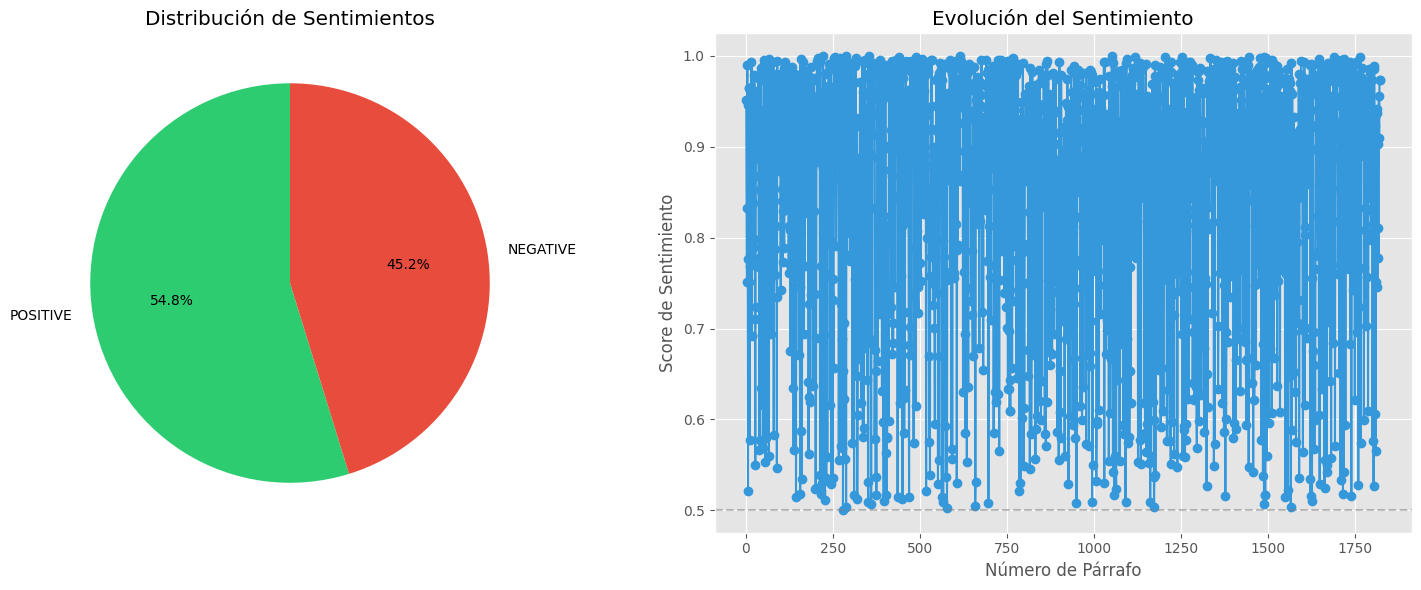

In [17]:
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt
from anthropic import Anthropic
import seaborn as sns
import numpy as np

def analyze_and_interpret_sentiments(text):
    """
    Analiza los sentimientos del texto y los interpreta usando Claude
    """
    # Crear pipeline de análisis de sentimientos
    sentiment_analyzer = pipeline("sentiment-analysis")

    # Dividir el texto en párrafos y analizar cada uno
    paragraphs = [p for p in text.split("\n") if p.strip()]
    sentiments = sentiment_analyzer(paragraphs)

    # Crear DataFrame con los resultados
    df = pd.DataFrame({
        'párrafo': range(1, len(sentiments) + 1),
        'sentimiento': [s['label'] for s in sentiments],
        'score': [s['score'] for s in sentiments]
    })

    # Calcular estadísticas
    stats = {
        'total_parrafos': len(df),
        'positivos': len(df[df['sentimiento'] == 'POSITIVE']),
        'negativos': len(df[df['sentimiento'] == 'NEGATIVE']),
        'score_promedio': df['score'].mean(),
        'score_min': df['score'].min(),
        'score_max': df['score'].max()
    }

    return df, stats, paragraphs

def visualize_sentiments(df):
    """
    Crea visualizaciones del análisis de sentimientos
    """
    # Configurar el estilo
    plt.style.use('ggplot')

    # Crear figura con dos subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # 1. Gráfico de torta de distribución de sentimientos
    sentiment_counts = df['sentimiento'].value_counts()
    colors = ['#2ecc71', '#e74c3c'] if 'POSITIVE' in sentiment_counts.index else ['#e74c3c', '#2ecc71']
    ax1.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90)
    ax1.set_title('Distribución de Sentimientos')

    # 2. Gráfico de línea de scores por párrafo
    ax2.plot(df['párrafo'], df['score'], marker='o', color='#3498db')
    ax2.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
    ax2.set_xlabel('Número de Párrafo')
    ax2.set_ylabel('Score de Sentimiento')
    ax2.set_title('Evolución del Sentimiento')

    plt.tight_layout()
    return fig

def get_claude_interpretation(df, stats, paragraphs):
    """
    Obtiene una interpretación de los resultados usando Claude
    """
    client = Anthropic(api_key=os.environ["ANTHROPIC_API_KEY"])

    # Crear un resumen de los resultados para Claude
    results_summary = f"""
    Estadísticas del análisis de sentimientos:
    - Total de párrafos analizados: {stats['total_parrafos']}
    - Párrafos positivos: {stats['positivos']} ({stats['positivos']/stats['total_parrafos']*100:.1f}%)
    - Párrafos negativos: {stats['negativos']} ({stats['negativos']/stats['total_parrafos']*100:.1f}%)
    - Score promedio: {stats['score_promedio']:.3f}
    - Score mínimo: {stats['score_min']:.3f}
    - Score máximo: {stats['score_max']:.3f}
    """

    prompt = f"""Analiza los siguientes resultados de un análisis de sentimientos de un texto educativo y proporciona una interpretación clara y concisa.

    {results_summary}

    Por favor, proporciona:
    1. Una interpretación general del tono del texto
    2. Patrones o tendencias importantes
    3. Implicaciones para el contexto educativo

    Mantén la respuesta concisa y enfocada en los puntos más relevantes.
    """

    response = client.messages.create(
        model="claude-3-sonnet-20240229",
        max_tokens=1024,
        messages=[
            {"role": "user", "content": prompt}
        ]
    )

    return response.content[0].text

def analyze_text_sentiment(text):
    """
    Función principal que combina todo el análisis
    """
    # Realizar análisis
    df, stats, paragraphs = analyze_and_interpret_sentiments(text)

    # Crear visualizaciones
    fig = visualize_sentiments(df)

    # Obtener interpretación de Claude
    interpretation = get_claude_interpretation(df, stats, paragraphs)

    # Mostrar resultados
    print("\nEstadísticas del Análisis de Sentimientos:")
    print("-" * 50)
    print(f"Total de párrafos analizados: {stats['total_parrafos']}")
    print(f"Párrafos positivos: {stats['positivos']} ({stats['positivos']/stats['total_parrafos']*100:.1f}%)")
    print(f"Párrafos negativos: {stats['negativos']} ({stats['negativos']/stats['total_parrafos']*100:.1f}%)")
    print(f"Score promedio: {stats['score_promedio']:.3f}")
    print(f"Score mínimo: {stats['score_min']:.3f}")
    print(f"Score máximo: {stats['score_max']:.3f}")

    print("\nInterpretación del Análisis:")
    print("-" * 50)
    print(interpretation)

    plt.show()

    return df, stats, interpretation

# Ejecutar el análisis completo
df, stats, interpretation = analyze_text_sentiment(transcription_text)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


Reporte generado exitosamente en: file:///content/sentiment_analysis_report.html


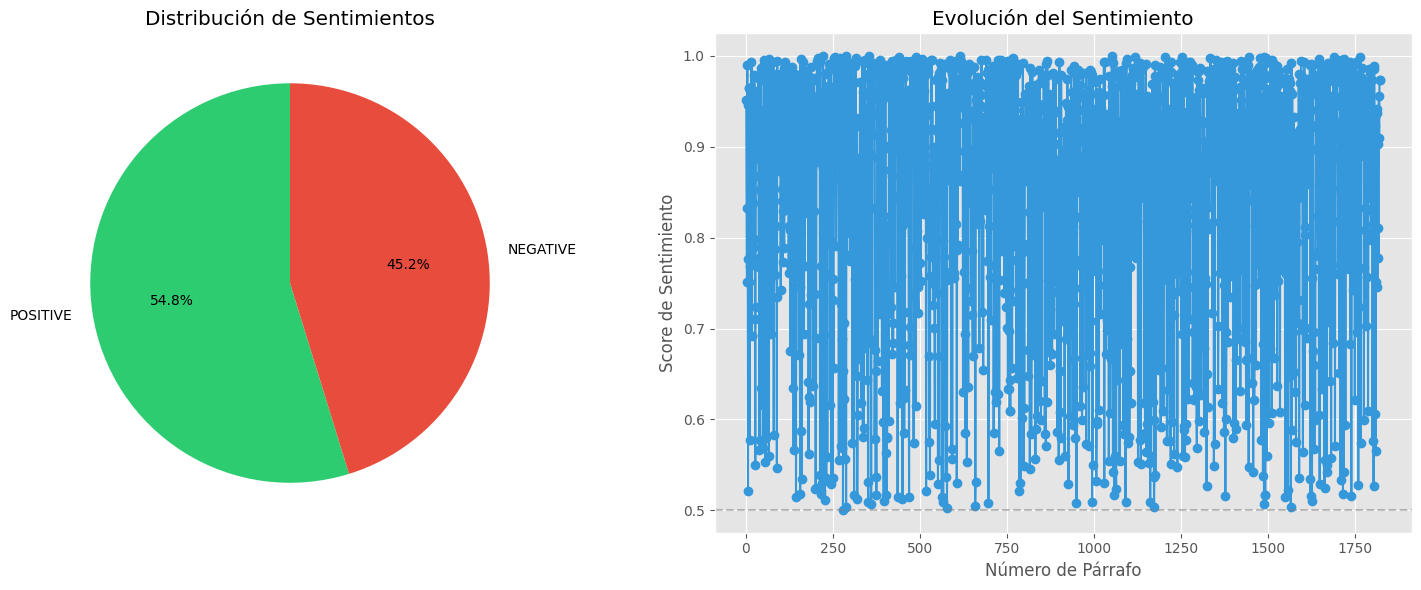

In [20]:
import base64
from io import BytesIO
from datetime import datetime
import os
import html

def generate_sentiment_report(text, output_path='sentiment_analysis_report.html'):
    """
    Genera un reporte HTML completo del análisis de sentimientos
    """
    # Realizar el análisis
    df, stats, paragraphs = analyze_and_interpret_sentiments(text)

    # Obtener interpretación de Claude
    interpretation = get_claude_interpretation(df, stats, paragraphs)

    # Crear visualizaciones y convertirlas a base64
    fig = visualize_sentiments(df)
    buf = BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight', dpi=300)
    buf.seek(0)  # Resetear el cursor del buffer
    img_base64 = base64.b64encode(buf.getvalue()).decode('utf-8')
    buf.close()

    # Escapar caracteres especiales en la interpretación
    escaped_interpretation = html.escape(interpretation).replace('\n', '<br>')

    # Generar HTML
    html_content = f"""
    <!DOCTYPE html>
    <html lang='es'>
    <head>
        <meta charset='UTF-8'>
        <meta name='viewport' content='width=device-width, initial-scale=1.0'>
        <title>Análisis de Sentimientos - Reporte</title>
        <style>
            /* Estilos del reporte aquí */
        </style>
    </head>
    <body>
        <div class='container'>
            <h1>Análisis de Sentimientos - Reporte Detallado</h1>
            <p><strong>Fecha de generación:</strong> {datetime.now().strftime('%d/%m/%Y %H:%M')}</p>

            <h2>Estadísticas Generales</h2>
            <div class='stats-grid'>
                <div class='stat-card'>
                    <h3>Total de Párrafos</h3>
                    <div class='stat-value'>{stats['total_parrafos']}</div>
                </div>
                <div class='stat-card'>
                    <h3>Párrafos Positivos</h3>
                    <div class='stat-value'>{stats['positivos']} ({stats['positivos']/stats['total_parrafos']*100:.1f}%)</div>
                </div>
                <div class='stat-card'>
                    <h3>Párrafos Negativos</h3>
                    <div class='stat-value'>{stats['negativos']} ({stats['negativos']/stats['total_parrafos']*100:.1f}%)</div>
                </div>
                <div class='stat-card'>
                    <h3>Score Promedio</h3>
                    <div class='stat-value'>{stats['score_promedio']:.3f}</div>
                </div>
            </div>

            <h2>Visualizaciones</h2>
            <div class='visualization'>
                <img src='data:image/png;base64,{img_base64}' alt='Visualizaciones de sentimientos'>
            </div>

            <h2>Interpretación del Análisis</h2>
            <div class='interpretation'>
                {escaped_interpretation}
            </div>

            <h2>Detalles por Párrafo</h2>
            <table>
                <thead>
                    <tr>
                        <th>Párrafo</th>
                        <th>Sentimiento</th>
                        <th>Score</th>
                    </tr>
                </thead>
                <tbody>
                    {''.join(f"<tr><td>{row['párrafo']}</td><td>{row['sentimiento']}</td><td>{row['score']:.3f}</td></tr>" for _, row in df.iterrows())}
                </tbody>
            </table>

            <footer>
                <p>Generado automáticamente usando Python y Claude</p>
            </footer>
        </div>
    </body>
    </html>
    """

    # Guardar el reporte
    with open(output_path, 'w', encoding='utf-8') as f:
        f.write(html_content)

    output_file_path = os.path.abspath(output_path)
    print(f"Reporte generado exitosamente en: file://{output_file_path}")

# Generar el reporte
generate_sentiment_report(transcription_text)


### Gráficos para Análisis de Temas

In [21]:
!pip install gensim pyLDAvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.7 MB/s eta 0:00:00


In [23]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Preprocesar el texto
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

nltk.download("punkt")
nltk.download("stopwords")
nltk.download('punkt_tab')


def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words("english"))
    return [word for word in tokens if word.isalnum() and word not in stop_words]

# Tokenizar la transcripción
tokens = preprocess_text(transcription_text)

# Crear un diccionario y un corpus
dictionary = corpora.Dictionary([tokens])
corpus = [dictionary.doc2bow(tokens)]

# Crear modelo LDA
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)

# Visualizar temas
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [24]:
# Guardar la visualización en un archivo HTML
pyLDAvis.save_html(lda_vis, "lda_visualization.html")
print("Visualización guardada en 'lda_visualization.html'.")


Visualización guardada en 'lda_visualization.html'.


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
# Exportar temas como texto
topics = lda_model.show_topics(num_topics=-1, num_words=10, formatted=False)
with open("lda_topics.txt", "w") as f:
    for i, words in topics:
        f.write(f"Tema {i + 1}: " + ", ".join([word for word, _ in words]) + "\n")
print("Temas exportados a 'lda_topics.txt'.")


Temas exportados a 'lda_topics.txt'.


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Visualización del Impacto

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Contar las palabras más frecuentes
word_counts = Counter(tokens)
most_common_words = word_counts.most_common(10)

# Gráfico de barras
words, counts = zip(*most_common_words)
plt.bar(words, counts)
plt.title("Palabras más frecuentes")
plt.xticks(rotation=45)
plt.show()


### Resumen Visual

Diagrama de Sankey

Un diagrama de Sankey es excelente para mostrar relaciones entre temas principales y secundarios o el flujo lógico de una narrativa.

In [ ]:
!pip install plotly


In [ ]:
import plotly.graph_objects as go

def create_sankey_chart(data):
    """
    Crea un diagrama de Sankey para representar visualmente el resumen del discurso.
    """
    # Definir los nodos (temas principales y secundarios)
    nodes = list(set([item for sublist in data for item in sublist]))
    node_indices = {node: i for i, node in enumerate(nodes)}

    # Definir las conexiones entre los nodos
    sources = [node_indices[source] for source, target, value in data]
    targets = [node_indices[target] for source, target, value in data]
    values = [value for source, target, value in data]

    # Crear el diagrama de Sankey
    fig = go.Figure(go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=nodes
        ),
        link=dict(
            source=sources,
            target=targets,
            value=values
        )
    ))

    fig.update_layout(title_text="Resumen Visual del Discurso", font_size=10)
    fig.show()

# Datos de ejemplo (modifica según el análisis del discurso)
sankey_data = [
    ("Innovación", "Uso de tecnología", 5),
    ("Innovación", "Ejemplos prácticos", 3),
    ("Uso de tecnología", "Herramientas digitales", 2),
    ("Uso de tecnología", "Aplicaciones móviles", 3),
    ("Ejemplos prácticos", "Casos reales", 4),
    ("Casos reales", "Impacto en el aula", 6),
]

# Crear el diagrama
create_sankey_chart(sankey_data)


Mapa Mental

Si prefieres un mapa mental, podemos usar networkx y matplotlib para generar un gráfico de nodos.

In [ ]:
!pip install networkx matplotlib


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def create_mind_map(data):
    """
    Crea un mapa mental para representar visualmente el discurso.
    """
    G = nx.DiGraph()

    # Agregar nodos y relaciones
    for source, target, _ in data:
        G.add_edge(source, target)

    # Crear el diseño del gráfico
    pos = nx.spring_layout(G, k=0.5, iterations=50)
    plt.figure(figsize=(12, 8))
    nx.draw_networkx(
        G, pos, with_labels=True, node_color="lightblue", edge_color="gray",
        font_size=10, font_weight="bold", node_size=3000
    )
    plt.title("Mapa Mental del Discurso", fontsize=16)
    plt.axis("off")
    plt.show()

# Usar los mismos datos de ejemplo
create_mind_map(sankey_data)


### Grafo con networkx y matplotlib


In [ ]:
!pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt

def create_graph(data):
    """
    Crea un grafo simple para representar las conexiones entre temas.
    """
    G = nx.Graph()

    # Agregar nodos y relaciones desde los datos
    for source, target, weight in data:
        G.add_edge(source, target, weight=weight)

    # Crear un diseño para el grafo
    pos = nx.spring_layout(G, k=0.5)

    # Dibujar el grafo
    plt.figure(figsize=(12, 8))
    nx.draw(
        G, pos, with_labels=True, node_color="skyblue", edge_color="gray",
        font_size=10, font_weight="bold", node_size=3000
    )

    # Agregar etiquetas para los pesos de las conexiones
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

    plt.title("Grafo de Temas del Discurso", fontsize=16)
    plt.axis("off")
    plt.show()

# Datos de ejemplo (tema principal, tema relacionado, peso de conexión)
graph_data = [
    ("Innovación", "Uso de tecnología", 5),
    ("Innovación", "Ejemplos prácticos", 3),
    ("Uso de tecnología", "Herramientas digitales", 4),
    ("Ejemplos prácticos", "Casos reales", 2),
    ("Casos reales", "Impacto en el aula", 6)
]

# Crear el grafo
create_graph(graph_data)


### Grafo Interactivo con pyvis


In [ ]:
!pip install pyvis


In [ ]:
from pyvis.network import Network

def create_interactive_graph(data):
    """
    Crea un grafo interactivo usando pyvis.
    """
    net = Network(notebook=True, height="750px", width="100%", bgcolor="#ffffff", font_color="black")

    # Agregar nodos y relaciones desde los datos
    for source, target, weight in data:
        net.add_node(source, title=source)
        net.add_node(target, title=target)
        net.add_edge(source, target, value=weight)

    # Configurar opciones del grafo
    net.set_options('''
    var options = {
      "nodes": {
        "color": {
          "border": "rgba(0,0,0,1)",
          "background": "rgba(135,206,250,1)"
        }
      },
      "edges": {
        "color": {
          "inherit": true
        },
        "smooth": {
          "type": "dynamic"
        }
      }
    }
    ''')

    # Mostrar el grafo
    net.show("graph.html")

# Crear el grafo interactivo
create_interactive_graph(graph_data)


## Datos Dinámicos:

Usa un modelo LLM para extraer automáticamente temas principales, relaciones, y pesos del discurso

In [ ]:
from anthropic import Client
import os

# Cliente de Anthropic
client = Client(api_key=os.environ["ANTHROPIC_API_KEY"])

def extract_topics_and_relations(text):
    """
    Extrae temas principales, relaciones y pesos del discurso usando un LLM.
    """
    prompt = f"""
    You are an expert in discourse analysis. Based on the following transcript, extract the main topics, their subtopics,
    and the relationships between them. Include a relevance score (1-10) for each relationship.

    Transcript:
    {text}

    Provide the output in the following format:
    [
        ("Main Topic", "Related Topic", Relevance Score),
        ...
    ]
    """
    response = client.completion(
        prompt=prompt,
        model="claude-3-5-sonnet-20241022",
        max_tokens_to_sample=1000,
        stop_sequences=["\n\n"]
    )
    return eval(response["completion"])

# Usar la función en la transcripción
with open("transcription.txt", "r") as f:
    transcription_text = f.read()

relations_data = extract_topics_and_relations(transcription_text)
print("Relaciones extraídas:\n", relations_data)


## Crear un Grafo Dinámico con los Datos Extraídos
Ahora que tenemos los datos generados, podemos usarlos para construir un grafo dinámico.

Grafo Dinámico con pyvis:

In [ ]:
from pyvis.network import Network

def create_dynamic_graph(data):
    """
    Crea un grafo interactivo usando datos generados por un modelo LLM.
    """
    net = Network(notebook=True, height="750px", width="100%", bgcolor="#ffffff", font_color="black")

    # Agregar nodos y relaciones
    for source, target, weight in data:
        net.add_node(source, title=source)
        net.add_node(target, title=target)
        net.add_edge(source, target, value=weight)

    # Configurar opciones del grafo
    net.set_options('''
    var options = {
      "nodes": {
        "color": {
          "border": "rgba(0,0,0,1)",
          "background": "rgba(135,206,250,1)"
        }
      },
      "edges": {
        "color": {
          "inherit": true
        },
        "smooth": {
          "type": "dynamic"
        }
      }
    }
    ''')

    # Mostrar el grafo
    net.show("dynamic_graph.html")

# Crear el grafo dinámico con los datos extraídos
create_dynamic_graph(relations_data)


### Nube de Palabras: Resalta Términos Frecuentes
Crea una nube de palabras para identificar rápidamente las palabras clave más utilizadas en el discurso.



In [ ]:
!pip install wordcloud matplotlib

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud_from_topics(data):
    """
    Genera una nube de palabras basada en los temas y sus pesos.
    """
    # Crear un diccionario con temas y pesos
    topic_weights = {source: weight for source, _, weight in data}
    topic_weights.update({target: weight for _, target, weight in data})

    # Generar la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(topic_weights)

    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Nube de Palabras Basada en Temas", fontsize=16)
    plt.show()

# Generar la nube de palabras
generate_wordcloud_from_topics(relations_data)


## Mapa de Calor: Relación Entre Temas
Un mapa de calor (heatmap) muestra cómo de fuertes son las relaciones entre temas principales y secundarios.

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def create_heatmap(data):
    """
    Genera un mapa de calor para visualizar las relaciones entre temas.
    """
    # Crear un DataFrame a partir de los datos
    df = pd.DataFrame(data, columns=["Tema Principal", "Tema Relacionado", "Peso"])

    # Pivotar la tabla para crear la matriz
    matrix = df.pivot("Tema Principal", "Tema Relacionado", "Peso")

    # Crear el mapa de calor
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, cmap="Blues", fmt=".1f")
    plt.title("Mapa de Calor de Relaciones entre Temas", fontsize=16)
    plt.show()

# Generar el mapa de calor
create_heatmap(relations_data)


## Análisis Temporal: Evolución de Temas
Si tu discurso está dividido en segmentos temporales (e.g., minutos o secciones), puedes analizar cómo evolucionan los temas a lo largo del tiempo.



In [ ]:
import matplotlib.pyplot as plt

def plot_topic_evolution(data, timestamps):
    """
    Visualiza la evolución de los temas principales en el tiempo.
    """
    # Crear un diccionario para contar la aparición de temas por timestamp
    topic_evolution = {topic: [0] * len(timestamps) for topic, _, _ in data}

    # Llenar el diccionario con datos
    for i, (topic, _, weight) in enumerate(data):
        topic_evolution[topic][i % len(timestamps)] += weight

    # Graficar la evolución
    plt.figure(figsize=(12, 6))
    for topic, values in topic_evolution.items():
        plt.plot(timestamps, values, label=topic)

    plt.title("Evolución de Temas en el Tiempo", fontsize=16)
    plt.xlabel("Tiempo")
    plt.ylabel("Relevancia")
    plt.legend()
    plt.show()

# Ejemplo de timestamps (ajusta según tu análisis)
timestamps = ["Inicio", "Mitad", "Final"]
plot_topic_evolution(relations_data, timestamps)


## Árbol Jerárquico: Relación Principal-Secundaria
Visualiza los temas en forma de árbol jerárquico, con los temas principales como nodos padres y los secundarios como hijos

In [ ]:
!pip install plotly

import plotly.graph_objects as go

def create_tree_map(data):
    """
    Genera un árbol jerárquico para mostrar relaciones entre temas.
    """
    labels = []
    parents = []

    for source, target, weight in data:
        labels.append(target)
        parents.append(source)

    fig = go.Figure(go.Treemap(
        labels=labels + ["Total"],
        parents=parents + [""],
        values=[weight for _, _, weight in data] + [sum(weight for _, _, weight in data)]
    ))

    fig.update_layout(title="Árbol Jerárquico de Temas")
    fig.show()

# Crear el árbol jerárquico
create_tree_map(relations_data)


## Predicciones y Análisis Contextual:
Usa un modelo de lenguaje para:

Generar predicciones sobre el impacto de los temas en el contexto del discurso (e.g., "¿Cómo impactará X en la educación?").

Identificar conexiones ocultas entre temas que no son evidentes en el análisis inicial.

In [ ]:
def generate_additional_insights(text):
    prompt = f"""
    Based on the following topics and relationships, provide additional insights or predictions:
    {relations_data}

    Insights should include:
    1. Hidden connections between topics.
    2. Future trends related to these topics.
    3. Recommendations for further exploration.

    Transcript:
    {text}
    """
    response = client.completion(
        prompt=prompt,
        model="claude-3-5-sonnet-20241022",
        max_tokens_to_sample=1000
    )
    return response["completion"]

additional_insights = generate_additional_insights(transcription_text)
print("Insights Adicionales:\n", additional_insights)
